# Feature Story 1 : Analyse et Préparation des Données

## Tâche 1 : Chargement des données

In [764]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path = r'C:\Users\azedd\OneDrive\Desktop\briefs\predicteur\assurance-maladie.csv'
df = pd.read_csv(path)

In [765]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [766]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [767]:
df.shape

(1338, 7)

In [768]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [769]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [770]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## Tache 2 : Analyse exploratoire des données

In [771]:
df.describe(include='all')
# print(df.median(numeric_only=True))  median = 50% column

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [772]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [773]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [774]:
df.duplicated().sum()

np.int64(1)

In [775]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [776]:
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:")
    print(df[col].value_counts())


sex:
sex
male      676
female    662
Name: count, dtype: int64

smoker:
smoker
no     1064
yes     274
Name: count, dtype: int64

region:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


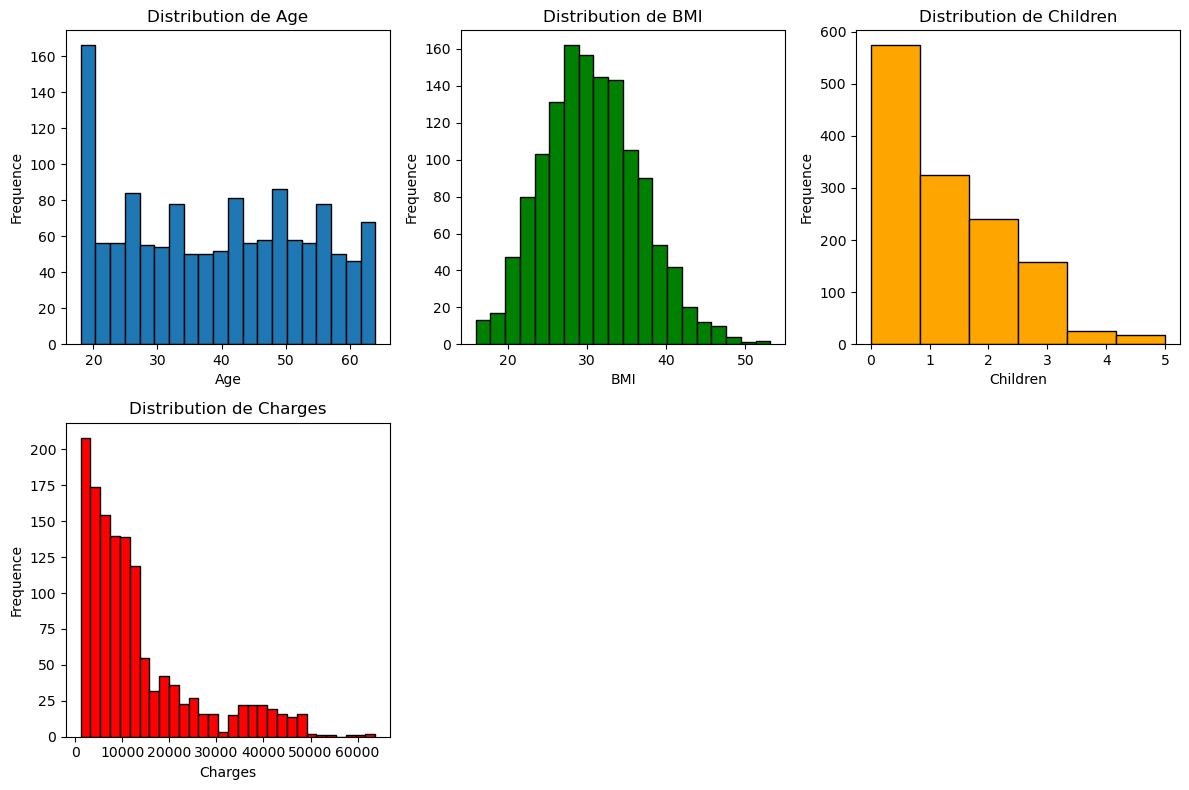

In [777]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.hist(df['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequence')
plt.title('Distribution de Age')

plt.subplot(2, 3, 2)
plt.hist(df['bmi'], bins=20, edgecolor='black', color='green')
plt.xlabel('BMI')
plt.ylabel('Frequence')
plt.title('Distribution de BMI')

plt.subplot(2, 3, 3)
plt.hist(df['children'], bins=6, edgecolor='black', color='orange')
plt.xlabel('Children')
plt.ylabel('Frequence')
plt.title('Distribution de Children')

plt.subplot(2, 3, 4)
plt.hist(df['charges'], bins=30, edgecolor='black', color='red')
plt.xlabel('Charges')
plt.ylabel('Frequence')
plt.title('Distribution de Charges')

plt.tight_layout()
plt.show()

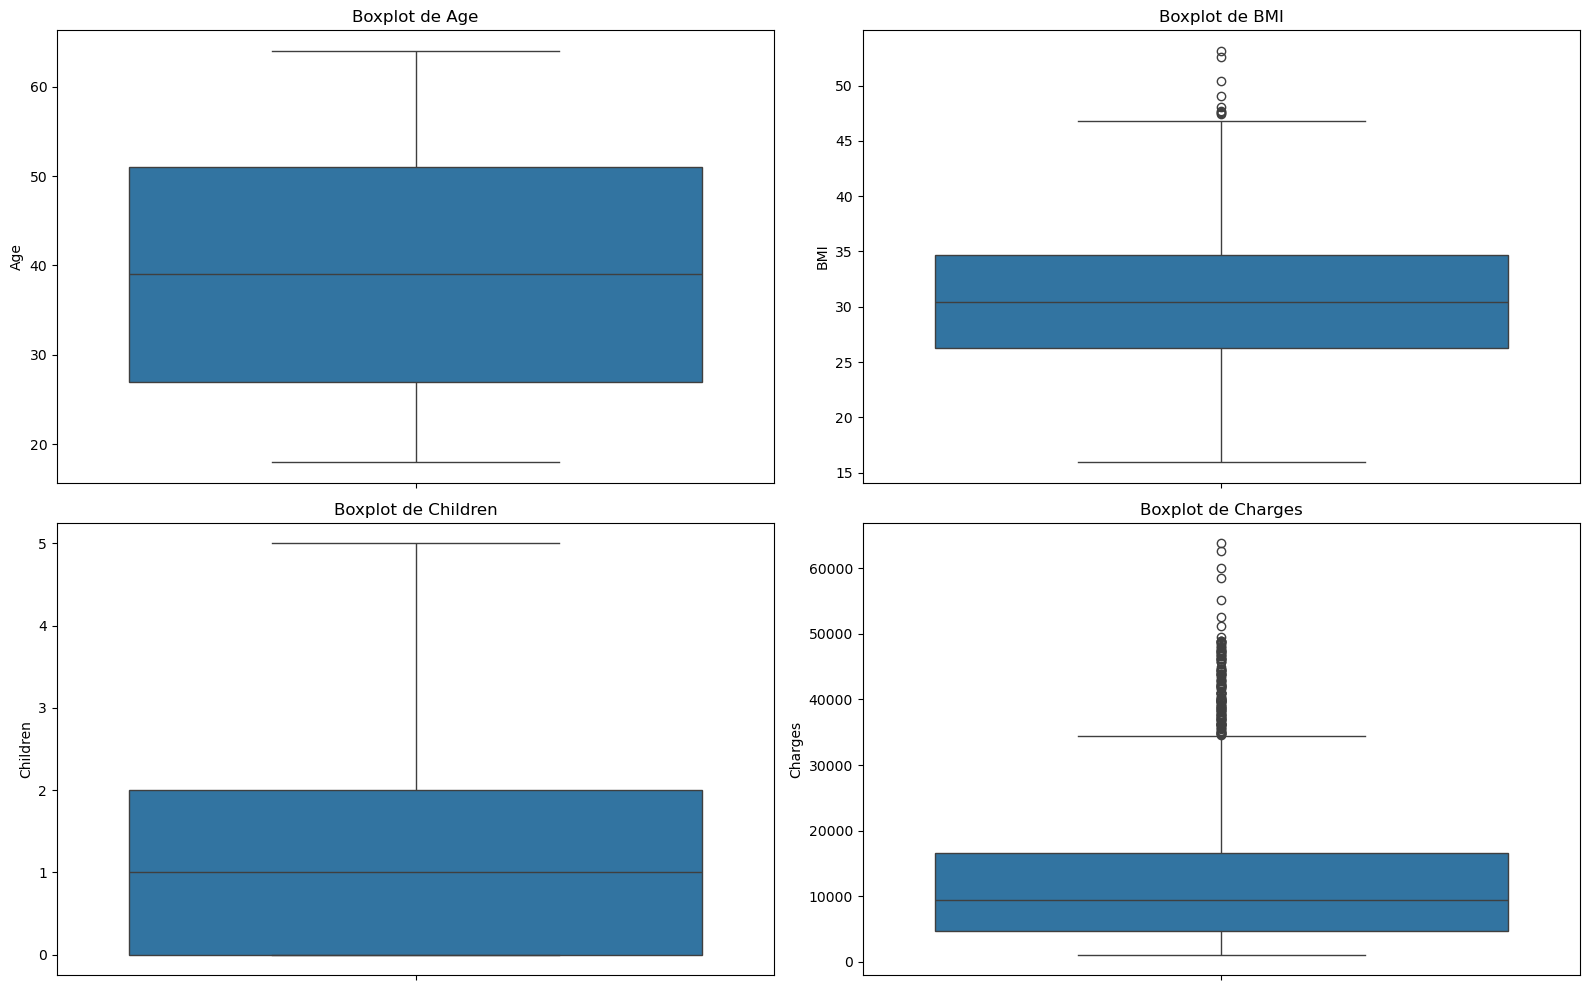

In [778]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.boxplot(y=df['age'])
plt.title('Boxplot de Age')
plt.ylabel('Age')

plt.subplot(2, 2, 2)
sns.boxplot(y=df['bmi'])
plt.title('Boxplot de BMI')
plt.ylabel('BMI')

plt.subplot(2, 2, 3)
sns.boxplot(y=df['children'])
plt.title('Boxplot de Children')
plt.ylabel('Children')

plt.subplot(2, 2, 4)
sns.boxplot(y=df['charges'])
plt.title('Boxplot de Charges')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()

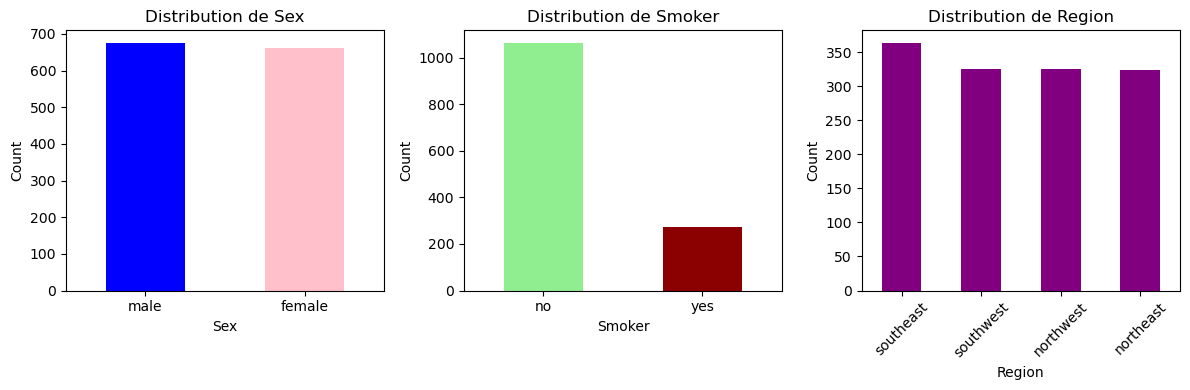

In [779]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
df['sex'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution de Sex')
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
df['smoker'].value_counts().plot(kind='bar', color=['lightgreen', 'darkred'])
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Distribution de Smoker')
plt.xticks(rotation=0)

plt.subplot(1, 3, 3)
df['region'].value_counts().plot(kind='bar', color='purple')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution de Region')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [780]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

In [781]:
print(correlation_matrix)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


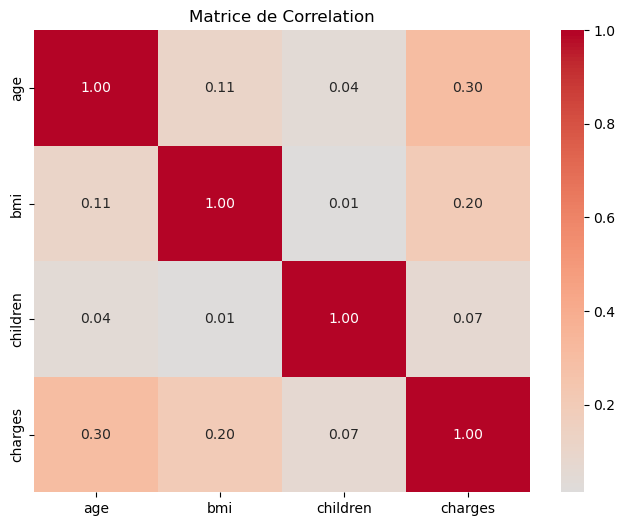

In [782]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matrice de Correlation')
plt.show()

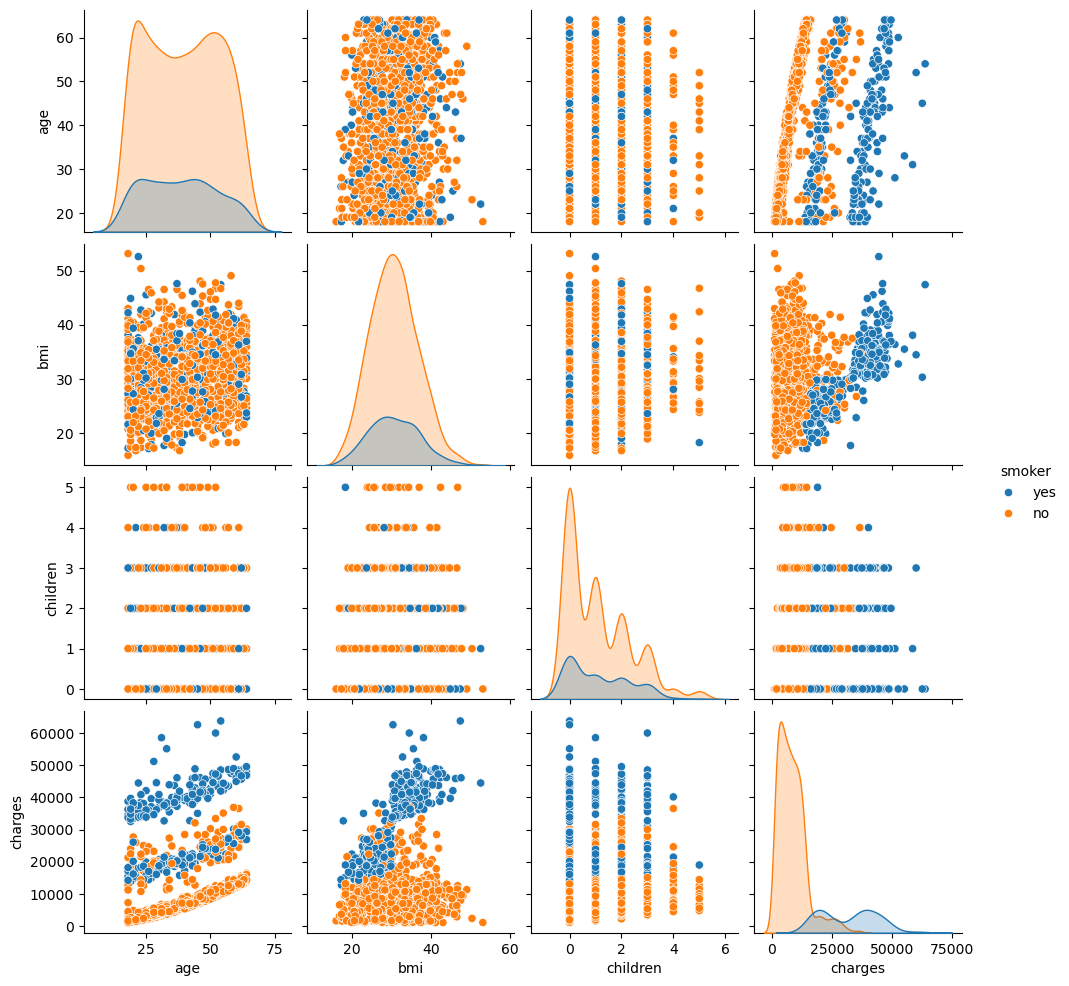

In [783]:
sns.pairplot(df, hue='smoker')
plt.show()

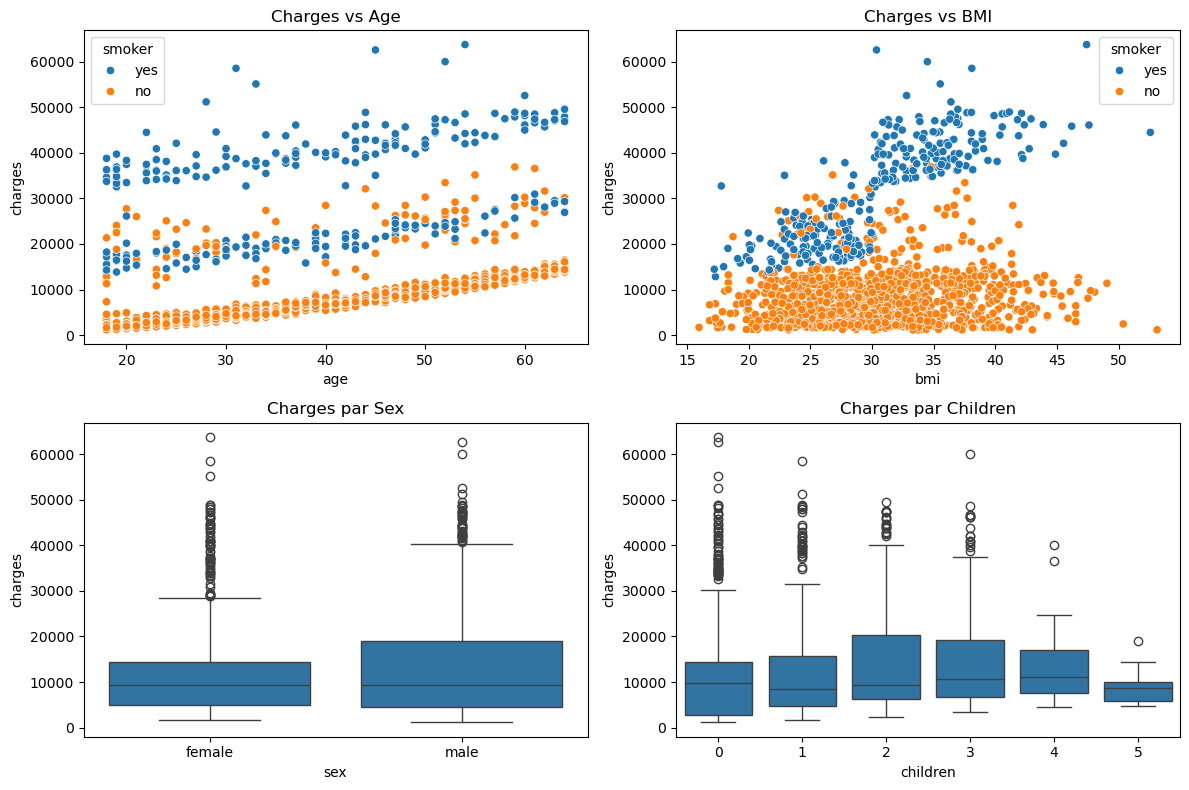

In [784]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='age', y='charges', data=df, hue='smoker')
plt.title('Charges vs Age')

plt.subplot(2, 2, 2)
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker')
plt.title('Charges vs BMI')

plt.subplot(2, 2, 3)
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Charges par Sex')

plt.subplot(2, 2, 4)
sns.boxplot(x='children', y='charges', data=df)
plt.title('Charges par Children')

plt.tight_layout()
plt.show()

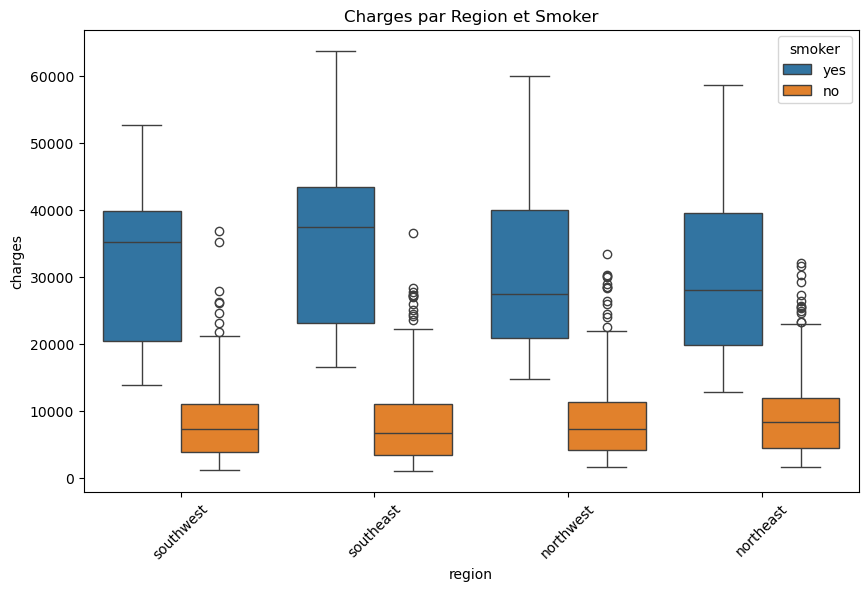

In [785]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=df, hue='smoker')
plt.title('Charges par Region et Smoker')
plt.xticks(rotation=45)
plt.show()

In [786]:
print(df.groupby('smoker')['charges'].mean())

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


In [787]:
print(df.groupby('sex')['charges'].mean())

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64


In [788]:
print(df.groupby('region')['charges'].mean())

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


## Tâche 3 : Prétraitement des Données

### 3.1 Gestion des valeurs manquantes
Nous allons vérifier s'il y a des valeurs manquantes et les traiter en utilisant l'imputation avec la médiane pour les variables numériques et le mode pour les variables catégoriques.

In [789]:
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())
print(f"\nPourcentage de valeurs manquantes :")
print((df.isnull().sum() / len(df)) * 100)

from sklearn.impute import SimpleImputer

numeric_columns = df.select_dtypes(include=[np.number]).columns
imputer_numeric = SimpleImputer(strategy='median')

categorical_columns = df.select_dtypes(include=['object']).columns
imputer_categorical = SimpleImputer(strategy='most_frequent')

df_clean = df.copy()
if df[numeric_columns].isnull().sum().sum() > 0:
    df_clean[numeric_columns] = imputer_numeric.fit_transform(df[numeric_columns])
    
if df[categorical_columns].isnull().sum().sum() > 0:
    df_clean[categorical_columns] = imputer_categorical.fit_transform(df[categorical_columns])

print("\nAprès imputation :")
print(df_clean.isnull().sum())

Valeurs manquantes par colonne :
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Pourcentage de valeurs manquantes :
age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

Après imputation :
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### 3.2 Suppression des doublons
Nous allons identifier et supprimer les lignes dupliquées pour éviter le biais dans notre modèle.

In [790]:
print(f"Nombre de lignes avant suppression des doublons : {len(df_clean)}")
print(f"Nombre de doublons : {df_clean.duplicated().sum()}")

df_clean = df_clean.drop_duplicates()
print(f"Nombre de lignes apres suppression des doublons : {len(df_clean)}")

df_clean = df_clean.reset_index(drop=True)
print("Doublons supprimes avec succes")

Nombre de lignes avant suppression des doublons : 1338
Nombre de doublons : 1
Nombre de lignes apres suppression des doublons : 1337
Doublons supprimes avec succes


###  Detection et gestion des valeurs aberrantes
Nous utiliserons plusieurs techniques pour identifier les outliers :
- Méthode IQR (Interquartile Range)
- Z-score (valeurs > 3)
- Visualisation avec des boxplots

In [791]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

from scipy import stats
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = df[z_scores > threshold]
    return outliers

numeric_cols = ['age', 'bmi', 'children', 'charges']

print("DETECTION DES OUTLIERS\n")
outliers_summary = {}

for col in numeric_cols:
    print(f"--- {col.upper()} ---")
    
    outliers_iqr, lower, upper = detect_outliers_iqr(df_clean, col)
    print(f"IQR - Nombre d'outliers : {len(outliers_iqr)}")
    print(f"IQR - Bornes : [{lower:.2f}, {upper:.2f}]")
    
    outliers_zscore = detect_outliers_zscore(df_clean, col)
    print(f"Z-score - Nombre d'outliers : {len(outliers_zscore)}")
    
    outliers_summary[col] = {
        'iqr_count': len(outliers_iqr),
        'zscore_count': len(outliers_zscore),
        'iqr_indices': outliers_iqr.index.tolist()
    }
    print()

DETECTION DES OUTLIERS

--- AGE ---
IQR - Nombre d'outliers : 0
IQR - Bornes : [-9.00, 87.00]
Z-score - Nombre d'outliers : 0

--- BMI ---
IQR - Nombre d'outliers : 9
IQR - Bornes : [13.67, 47.32]
Z-score - Nombre d'outliers : 4

--- CHILDREN ---
IQR - Nombre d'outliers : 0
IQR - Bornes : [-3.00, 5.00]
Z-score - Nombre d'outliers : 18

--- CHARGES ---
IQR - Nombre d'outliers : 139
IQR - Bornes : [-13120.72, 34524.78]
Z-score - Nombre d'outliers : 7



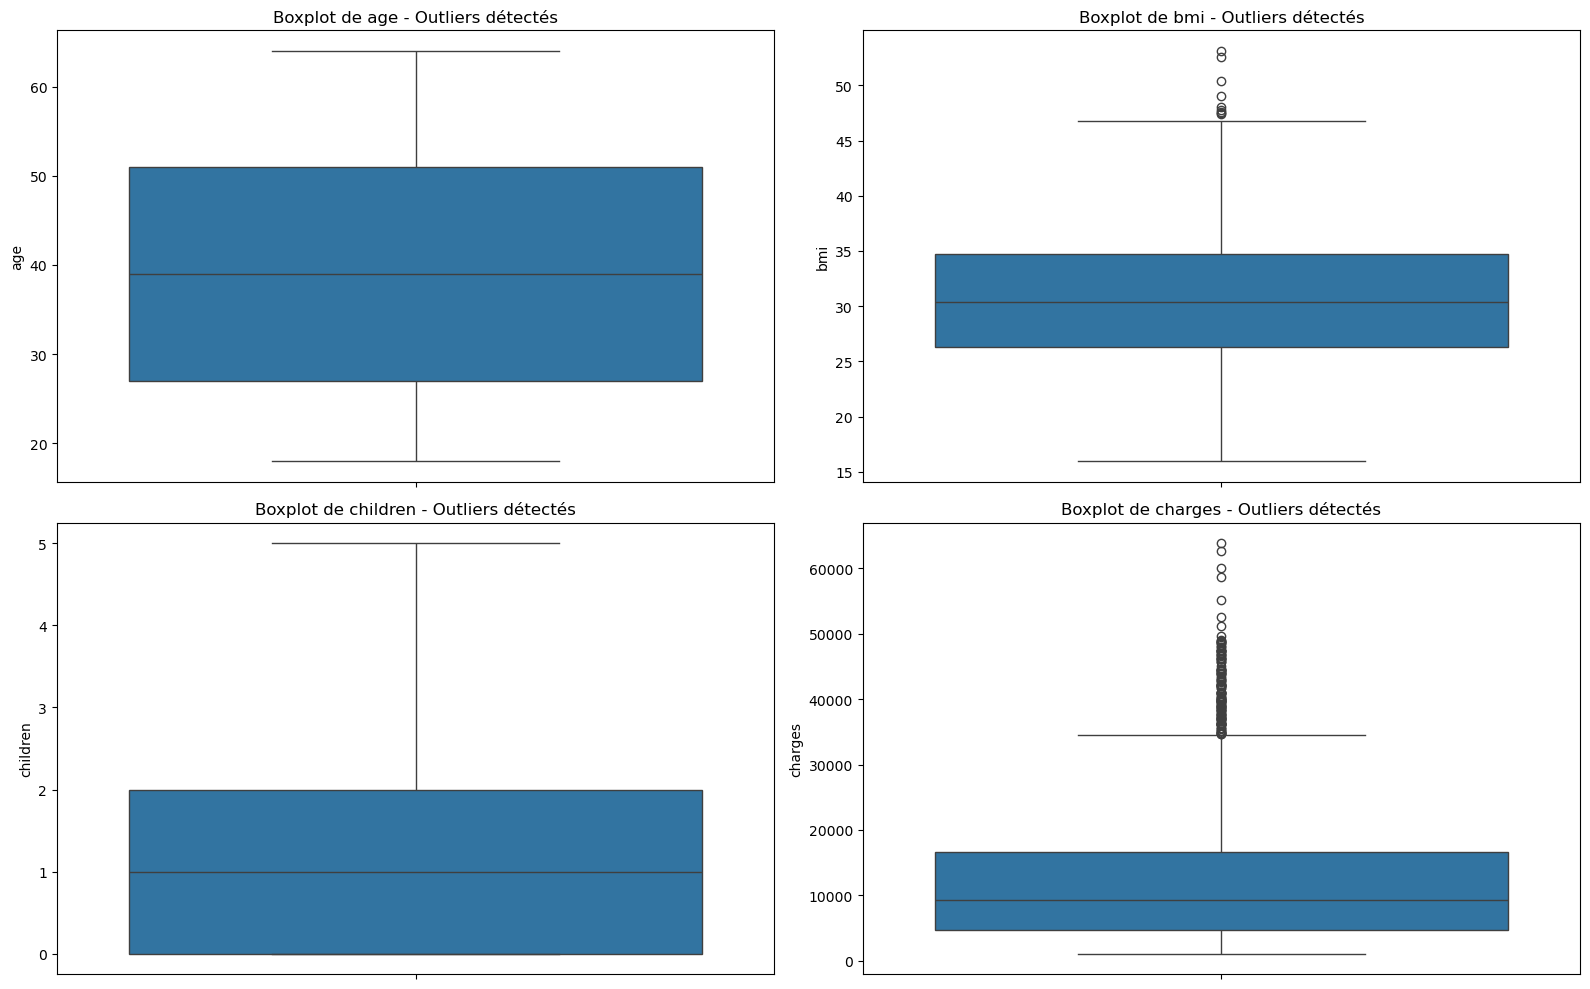

SUPPRESSION DES OUTLIERS
Taille avant suppression des outliers : 1337


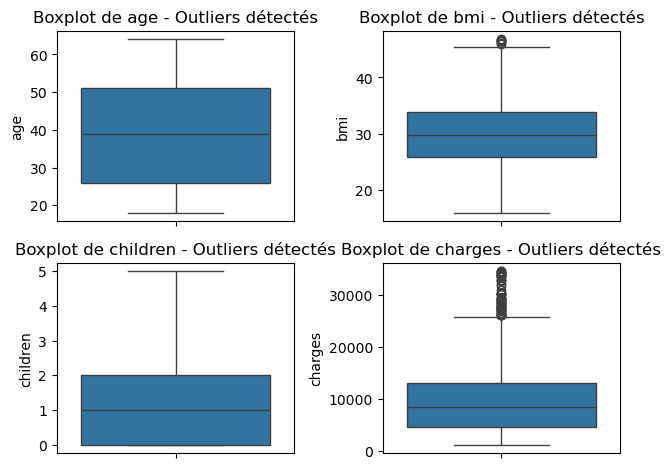

Outliers supprimes : 145
Taille apres suppression des outliers : 1192


In [792]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_clean[col])
    plt.title(f'Boxplot de {col} - Outliers détectés')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

print("SUPPRESSION DES OUTLIERS")
print(f"Taille avant suppression des outliers : {len(df_clean)}")

outliers_to_remove = set()

outliers_bmi, _, _ = detect_outliers_iqr(df_clean, 'bmi')
outliers_to_remove.update(outliers_bmi.index)

outliers_charges, _, _ = detect_outliers_iqr(df_clean, 'charges')
outliers_to_remove.update(outliers_charges.index)

outliers_ages, _, _ = detect_outliers_iqr(df_clean, 'age')
outliers_to_remove.update(outliers_ages.index)

outliers_children, _, _ = detect_outliers_iqr(df_clean, 'children')
outliers_to_remove.update(outliers_children.index)

df_clean = df_clean.drop(index=outliers_to_remove)
# df_clean = df_clean.reset_index(drop=True)
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_clean[col])
    plt.title(f'Boxplot de {col} - Outliers détectés')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

print(f"Outliers supprimes : {len(outliers_to_remove)}")
print(f"Taille apres suppression des outliers : {len(df_clean)}")

### 3.4 Encodage des variables catégoriques
Nous allons encoder les variables catégoriques (sex, smoker, region) en utilisant différentes techniques d'encodage.

In [793]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df_encoded = df_clean.copy()

print("ENCODAGE DES VARIABLES CATÉGORIQUES\n")

label_encoder = LabelEncoder()

df_encoded['sex_encoded'] = label_encoder.fit_transform(df_encoded['sex'])
print("Sex encoding:")
sex_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(sex_mapping)

df_encoded['smoker_encoded'] = label_encoder.fit_transform(df_encoded['smoker'])
print("\nSmoker encoding:")
smoker_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(smoker_mapping)

# region_mapping = {
#     "northwest": 0,
#     "northeast": 1,
#     "southeast": 2,
#     "southwest": 3
# }

# df_encoded['region_code'] = df_encoded['region'].map(region_mapping)
df_encoded['region_encoded'] = label_encoder.fit_transform(df_encoded['region'])


print(f"\nDataframe shape apres encodage: {df_encoded.shape}")
print("\nPremieres lignes des variables encodees:")
encoded_cols = ['sex', 'sex_encoded', 'smoker', 'smoker_encoded', 'region', 'region_encoded'] 
print(df_encoded[encoded_cols].head())

ENCODAGE DES VARIABLES CATÉGORIQUES

Sex encoding:
{'female': np.int64(0), 'male': np.int64(1)}

Smoker encoding:
{'no': np.int64(0), 'yes': np.int64(1)}

Dataframe shape apres encodage: (1192, 10)

Premieres lignes des variables encodees:
      sex  sex_encoded smoker  smoker_encoded     region  region_encoded
0  female            0    yes               1  southwest               3
1    male            1     no               0  southeast               2
2    male            1     no               0  southeast               2
3    male            1     no               0  northwest               1
4    male            1     no               0  northwest               1


### 3.5 Division des données en ensembles d'entraînement et de test
Nous allons diviser les données en ensembles d'entraînement (80%) et de test (20%) avec train_test_split.

In [794]:
from sklearn.model_selection import train_test_split, cross_val_score

feature_columns = ['age', 'bmi', 'children', 'sex_encoded', 'smoker_encoded', 'region_encoded'] 
X = df_encoded[feature_columns]
y = df_encoded['charges']

print("DIVISION DES DONNEES\n")
print(f"Features utilisees: {feature_columns}")
print(f"Target: charges")
print(f"Shape des features (X): {X.shape}")
print(f"Shape de la target (y): {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=None
)

print(f"\nTaille de l'ensemble d'entrainement: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Taille de l'ensemble de test: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\nStatistiques de la variable target:")
print(f"Train - charges moyennes: {y_train.mean():.2f}")
print(f"Test - charges moyennes: {y_test.mean():.2f}")
print(f"Train - ecart-type: {y_train.std():.2f}")
print(f"Test - ecart-type: {y_test.std():.2f}")

DIVISION DES DONNEES

Features utilisees: ['age', 'bmi', 'children', 'sex_encoded', 'smoker_encoded', 'region_encoded']
Target: charges
Shape des features (X): (1192, 6)
Shape de la target (y): (1192,)

Taille de l'ensemble d'entrainement: 953 (79.9%)
Taille de l'ensemble de test: 239 (20.1%)

Statistiques de la variable target:
Train - charges moyennes: 9786.64
Test - charges moyennes: 10597.56
Train - ecart-type: 7141.84
Test - ecart-type: 7649.12


### 3.6 Normalisation et Standardisation des variables numériques
Nous allons appliquer la normalisation (MinMaxScaler) et la standardisation (StandardScaler) sur les variables numériques pour harmoniser les échelles.

NORMALISATION ET STANDARDISATION

Variables numériques à scaler: ['age', 'bmi', 'children']
MinMax Scaler appliqué:
Statistiques des données normalisées (train):
              age         bmi    children
count  953.000000  953.000000  953.000000
mean     0.455746    0.457200    0.219307
std      0.306013    0.191771    0.245559
min      0.000000    0.000000    0.000000
25%      0.173913    0.319584    0.000000
50%      0.456522    0.447386    0.200000
75%      0.717391    0.580058    0.400000
max      1.000000    1.000000    1.000000

Standard Scaler applique:
Statistiques des données standardisees (train):
                age           bmi      children
count  9.530000e+02  9.530000e+02  9.530000e+02
mean   1.267495e-16  1.360693e-16  5.778286e-17
std    1.000525e+00  1.000525e+00  1.000525e+00
min   -1.490088e+00 -2.385342e+00 -8.935646e-01
25%   -9.214692e-01 -7.179807e-01 -8.935646e-01
50%    2.535812e-03 -5.120578e-02 -7.866789e-02
75%    8.554635e-01  6.409862e-01  7.362288e-01
m

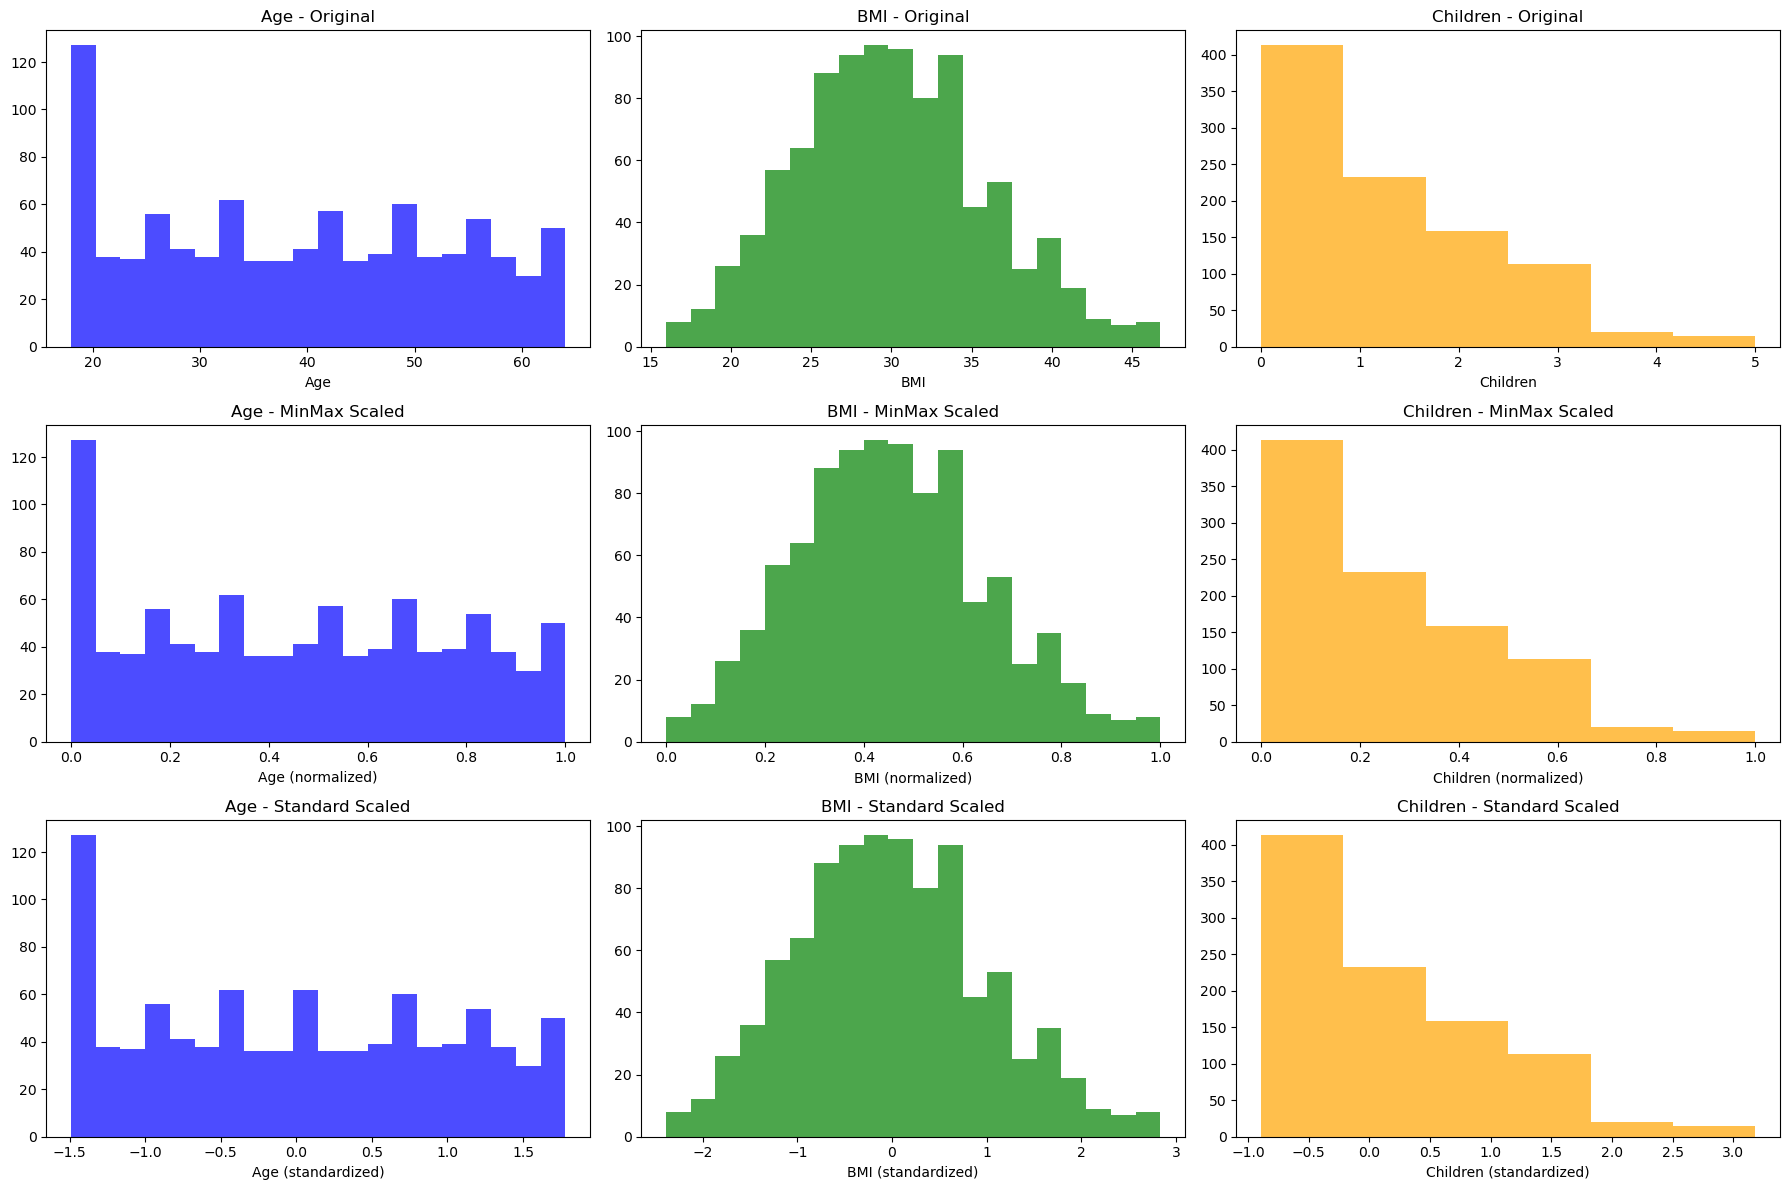


RESUME DU PRETRAITEMENT
✓ Valeurs manquantes traitees
✓ Doublons supprimes
✓ Outliers supprimes
✓ Variables categorique encodees
✓ Donnees divisees (80% train / 20% test)
✓ Features normalisees et standardisees

Datasets finaux:
- X_train original: (953, 6)
- X_train normalized: (953, 6)
- X_train standardized: (953, 6)
- y_train: (953,)


In [795]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

numeric_features = ['age', 'bmi', 'children']
print("NORMALISATION ET STANDARDISATION\n")
print(f"Variables numériques à scaler: {numeric_features}")

minmax_scaler = MinMaxScaler()

X_train_minmax = X_train.copy()
X_test_minmax = X_test.copy()

X_train_minmax[numeric_features] = minmax_scaler.fit_transform(X_train[numeric_features])
X_test_minmax[numeric_features] = minmax_scaler.transform(X_test[numeric_features])

print("MinMax Scaler appliqué:")
print("Statistiques des données normalisées (train):")
print(X_train_minmax[numeric_features].describe())

standard_scaler = StandardScaler()

X_train_standard = X_train.copy()
X_test_standard = X_test.copy()

X_train_standard[numeric_features] = standard_scaler.fit_transform(X_train[numeric_features])
X_test_standard[numeric_features] = standard_scaler.transform(X_test[numeric_features])

print(f"\nStandard Scaler applique:")
print("Statistiques des données standardisees (train):")
print(X_train_standard[numeric_features].describe())

plt.figure(figsize=(18, 12))

plt.subplot(3, 3, 1)
plt.hist(X_train['age'], bins=20, alpha=0.7, color='blue')
plt.title('Age - Original')
plt.xlabel('Age')

plt.subplot(3, 3, 2)
plt.hist(X_train['bmi'], bins=20, alpha=0.7, color='green')
plt.title('BMI - Original')
plt.xlabel('BMI')

plt.subplot(3, 3, 3)
plt.hist(X_train['children'], bins=6, alpha=0.7, color='orange')
plt.title('Children - Original')
plt.xlabel('Children')

plt.subplot(3, 3, 4)
plt.hist(X_train_minmax['age'], bins=20, alpha=0.7, color='blue')
plt.title('Age - MinMax Scaled')
plt.xlabel('Age (normalized)')

plt.subplot(3, 3, 5)
plt.hist(X_train_minmax['bmi'], bins=20, alpha=0.7, color='green')
plt.title('BMI - MinMax Scaled')
plt.xlabel('BMI (normalized)')

plt.subplot(3, 3, 6)
plt.hist(X_train_minmax['children'], bins=6, alpha=0.7, color='orange')
plt.title('Children - MinMax Scaled')
plt.xlabel('Children (normalized)')

plt.subplot(3, 3, 7)
plt.hist(X_train_standard['age'], bins=20, alpha=0.7, color='blue')
plt.title('Age - Standard Scaled')
plt.xlabel('Age (standardized)')

plt.subplot(3, 3, 8)
plt.hist(X_train_standard['bmi'], bins=20, alpha=0.7, color='green')
plt.title('BMI - Standard Scaled')
plt.xlabel('BMI (standardized)')

plt.subplot(3, 3, 9)
plt.hist(X_train_standard['children'], bins=6, alpha=0.7, color='orange')
plt.title('Children - Standard Scaled')
plt.xlabel('Children (standardized)')

plt.tight_layout()
plt.show()

print(f"\nRESUME DU PRETRAITEMENT")
print(f"✓ Valeurs manquantes traitees")
print(f"✓ Doublons supprimes")
print(f"✓ Outliers supprimes")
print(f"✓ Variables categorique encodees")
print(f"✓ Donnees divisees (80% train / 20% test)")
print(f"✓ Features normalisees et standardisees")
print(f"\nDatasets finaux:")
print(f"- X_train original: {X_train.shape}")
print(f"- X_train normalized: {X_train_minmax.shape}")
print(f"- X_train standardized: {X_train_standard.shape}")
print(f"- y_train: {y_train.shape}")

In [796]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



pipe1 = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

pipe1.fit(X_train_minmax, y_train)
y_pred = pipe1.predict(X_test_minmax)

rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

joblib.dump(pipe1, "linear_regression_pipeline.pkl")

results1 = {
    "model": "LinearRegression",
    "rmse": rmse,
    "mae": mae,
    "r2": r2
}

joblib.dump(results1, "linear_regression_results.pkl")


RMSE: 23223597.458664898
MAE: 2752.7027253719875
R²: 0.60140926498352


['linear_regression_results.pkl']

In [800]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipe2 = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("regressor", RandomForestRegressor())
])

pipe2.fit(X_train_minmax, y_train)
y_pred = pipe2.predict(X_test_minmax)

rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

joblib.dump(pipe2, "random_forest_pipeline.pkl")

results2 = {
    "model": "RandomForestRegressor",
    "rmse": rmse,
    "mae": mae,
    "r2": r2
}

joblib.dump(results2, "random_forest_results.pkl")
print(results1, results2)


RMSE: 23130132.307588417
MAE: 2563.581426161087
R²: 0.6030134240003264
{'model': 'LinearRegression', 'rmse': 23223597.458664898, 'mae': 2752.7027253719875, 'r2': 0.60140926498352} {'model': 'RandomForestRegressor', 'rmse': 23130132.307588417, 'mae': 2563.581426161087, 'r2': 0.6030134240003264}


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

pipe3 = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("regressor", XGBRegressor())
])

pipe3.fit(X_train_minmax, y_train)
y_pred = pipe3.predict(X_test_minmax)

rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

joblib.dump(pipe3, "xgbregressor_pipeline.pkl")

results3 = {
    "model": "XGBRegressor",
    "rmse": rmse,
    "mae": mae,
    "r2": r2
}

joblib.dump(results3, "xgbregressor_results.pkl")
